파이썬 머신러닝 완벽가이드 개정2판 9장 p.584-601

### **[개념 정리+코드 필사]📝**

# **09. 추천 시스템**

### **01. 추천시스템의 개요와 배경**

- 사용자의 구매이력, 평가이력, 취향 작성, 클릭 내역 등의 데이터 기반으로 추천엔진을 통해 사용자가 상품을 구매하도록 함
- 유형: ✅**콘텐츠 기반 필터링** / ✅**협업 필터링** :
  - 협업 필터링: ✅**최근접 이웃 협업 필터링** / ✅**잠재 요인 협업 필터링**
- 잠재요인 협업 필터링 기반(행렬분해)가 대부분 적용됨. 아마존은 최근접 이웃기반 사용. 요즘은 콘텐츠 기반+협업 기반 적절히 결합해 사용하기도 함

### **02. 콘텐츠 기반 필터링 추천시스템**

- 사용자가 특정한 아이템을 매우 선호하는 경우 그 아이템과 비슷한 콘텐츠를 가진 다른 아이템을 추천
- 영화의 경우, 높은 평점을 준 영화와 비슷한 장르, 배우, 콘텐츠 등을 감안한 유사 영화 추천

### **03. 최근접 이웃 협업 필터링**

- 취향이 비슷한 친구에게 물어보는 것과 유사
- 협업 필터링: 사용자가 아이템에 매긴 평점 정보나 상품 구매 이력과 같은 사용자 행동 양식만을 기반으로 추천수행
  - 사용자-아이템 평점 행렬
    - 행: 개별 사용자, 열: 개별 아이템, 값: 평점
    - pivot_table()로 행렬 형식을 맞춤
    - 다차원 행렬+희소행렬
  - 사용가자 평가한 아이템 기반으로 아직 평가하지 않은 아이템을 예측 평가함.

- 최근접 이웃 협업 필터링: 메모리 협업 필터링
  - 사용자 기반: 당신과 비슷한 고객들이 다음 상품도 구매함
    - 특정 사용자와 타 사용자 간의 유사도를 측정, 가장 높은 유사도의 N명 사용자를 추출해 그들의 선호 아이템 추천
    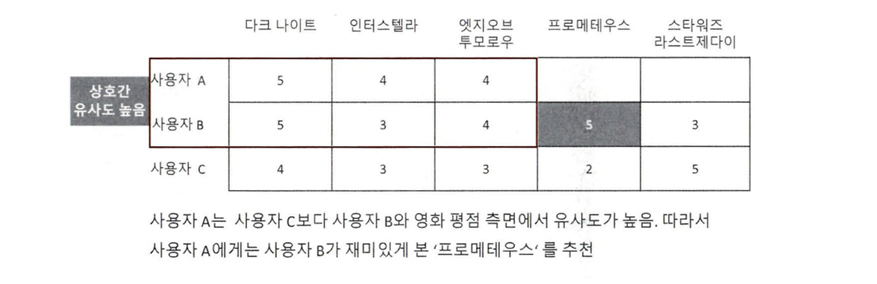
  - 아이템 기반: 이 상품을 선택한 다른 고객들은 다음 상품도 구매함
    - 사용자들의 선호 평가 척도를 따라 유사한 아이템 추천. 평점 분포가 비슷한 아이템들은 상호 간 아이템 유사도가 높음
    - 사용자 기반보다 정확도가 높음
    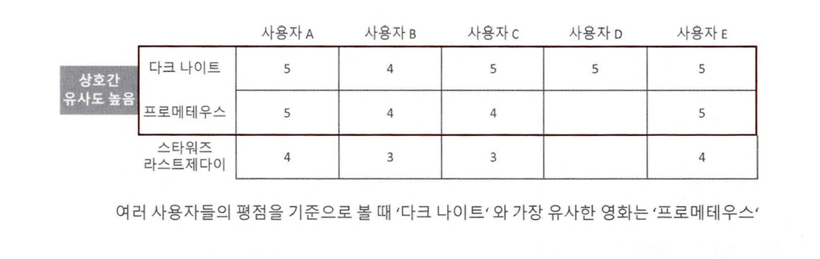
- 앞의 코사인 유사도를 유사도 측정에 많이 적용함.  



### **04. 잠재 요인 협업 필터링**

(1) 잠재요인 협업 필터링의 이해

- 행렬분해 기반: 대규모 다차원 행렬을 SVD같은 차원 감소기법으로 분해하는 과정에서 잠재 요인 추출
- 다차원 희소 행렬인 **사용자-아이템 평점** 행렬 데이터를 저차원 밀집 행렬인 **사용자-잠재요인 행렬**+**잠재요인-아이템 행렬**로 분해.  
  - 분해된 두 행렬의 내적으로 새로운 예측 사용자-아이템 평점 행렬 생성
  - 예측하지 않은 아이템에 대한 예측 평점 생성
  - 사용자-잠재요인 행렬(영화 장르에 대한 선호도)+잠재요인-아이템 행렬(영화 장르 별 특성값):
    - 평점은 사용자의 장르별 선호도 벡터와 장르별 특성 벡터를 서로 곱해서 만들 수 있으므로 두 행렬을 내적한 값으로 평점 예측함

  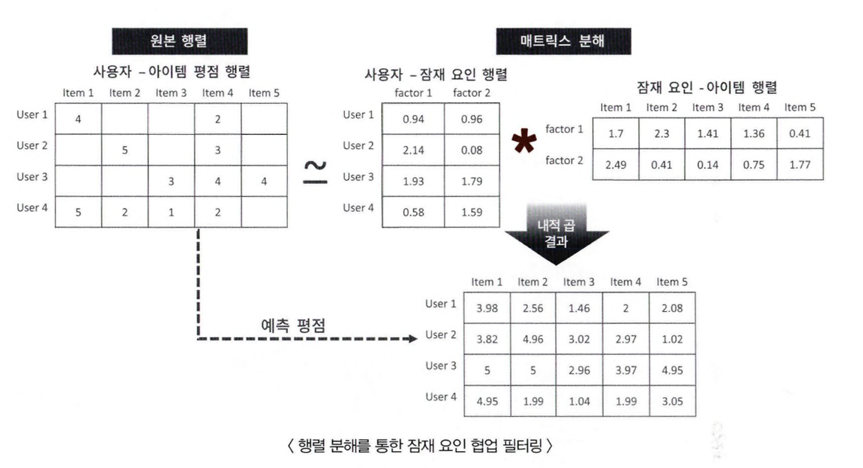

    





(2) 행렬 분해의 이해

- 다차원 매트릭스를 저차원 매트릭스로 분해. SVD, NMF 등
- 행렬R(MxN) = P(MxK) * Q.T(KxN)
  - M: 총사용자 수/ N: 총 아이템 수 /K: 잠재요인 차원 수
  - P의 개별 행은 개별 User에 대한 Latent Factor들을 반영
  - Q.T의 개별 열은 개별 Item에 대한 Latent Factor들을 반영
- 평점 데이터 ⭐$r_{u,i} = p_u * q_i^T$ 로 계산해 예측함
- 사용자-아이템 평점 행렬의 모든 평점값을 다시 계산할 수 있음
- NaN이 많은 행렬 분해 시 일반적인 SVD 대신 확률적 경사하강법 이용함

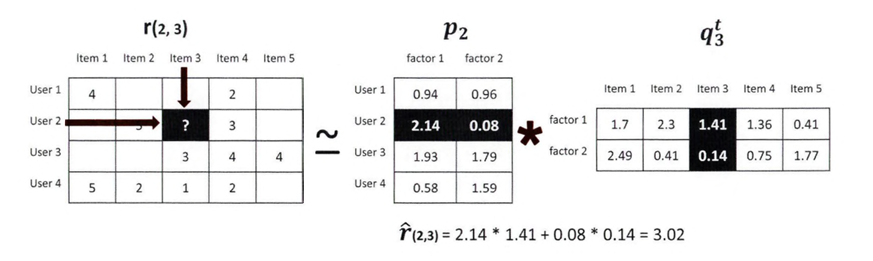

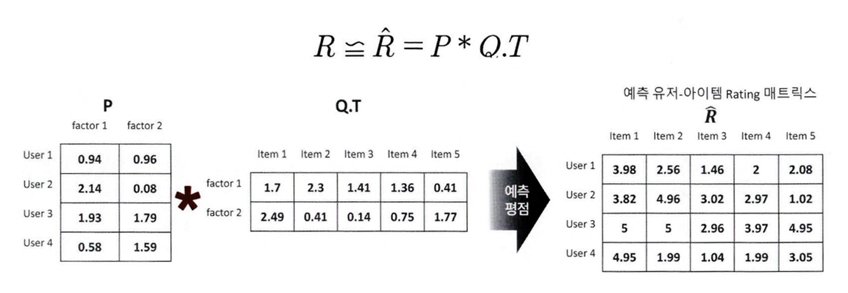

(3) 확률적 경사 하강법을 이용한 행렬 분해

- P와 Q 행렬로 계산된 예측 R행렬 값이 실제 R행렬 값과 가장 최소의 오류를 가질 수 있도록 반복적인 비용함수 최적화를 통해 P와 Q를 유추해냄
- 1. P와 Q를 임의의 행렬로 설정
  2. P * Q.T로 예측 R행렬을 계산하고 실제 R행렬과의 오류값을 계산
  3. 오류값을 최소화할 수 있도록 P와 Q를 업데이트
  4. 2,3 작업 반복하며 P와 Q 업데이트 해 근사화

- 비용함수 식:
  - $minΣ(r_{u,i} -p_u*q_i^t)^2 + λ(||q_i||^2 + ||p_u||^2)$
  - L2 규제를 고려한 식

- 업데이트되는 식
  - $p_u' = p_u + ƞ(e_{u,i}*q_i - λ*p_u)$
  - $q_i' = q_i + ƞ(e_{u,i}*p_u - λ*q_i)$
    - $p_u$: 행렬의 사용자 U행 벡터
    - $q_i'$: Q행렬의 아이템i행의 전치벡터
    - $e_{u,i}$: 실제 R행렬의 u,i 위치 값과 예측 행렬 값의 차이 오류
    - ƞ: SGD 학습률
    - λ: L2규제 계수

- L2 규제를 반영해 실제 R행렬과 예측 R행렬의 값의 차이를 최소화하는 방향성을 가지고 P행렬과 Q행렬에 업데이트 값을 반복적으로 수행, 최적화된 예측 R행렬을 구함
  - RMSE로 예측오차 계산

In [2]:
import numpy as np

# 원본행렬 R생성, 분해 행렬 P와 Q 초기화, 잠재요인 차원 K는 3으로 설정
R = np.array([[4, np.nan, np.nan, 2, np.nan],
              [np.nan, 5, np.nan, 3, 1],
              [np.nan, np.nan, 3, 4, 4],
              [5, 2, 1, 2, np.nan]])
num_users, num_items = R.shape
K = 3

# P와 Q 행렬의 크기를 지정하고 정규 분포를 가진 임의의 값으로 입력
np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users, K))
Q = np.random.normal(scale=1./K, size=(num_items, K))

In [4]:
from sklearn.metrics import mean_squared_error

def get_rmse(R, P, Q, non_zeros):
  error= 0
  # 두개의 분해된 행렬 P와 Q.T의 내적으로 예측 R행렬 생성
  full_pred_matrix = np.dot(P, Q.T)

  # 실제 R행렬에서 널이 아닌 값의 위치 인덱스 추출해 실제 R행렬과 예측 행렬의 RMSE 추출
  x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
  y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
  R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
  full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
  mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
  rmse = np.sqrt(mse)

  return rmse

In [6]:
# R > 0인 행, 열 위치, 값을 non_zeros 리스트에 저장
non_zeros = [(i, j, R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] > 0]

steps = 1000
learning_rate = 0.01
r_lambda = 0.01

# SGD 기법으로 P와 Q 매트릭스 계속 업데이트
for step in range(steps):
  for i, j, r in non_zeros:
    # 실제 값과 예측 값의 차이인 오류 값 구함
    eij = r - np.dot(P[i,:], Q[j,:].T)
    # Regularization을 반영한 SGD 업데이트 공식 적용
    P[i,:] = P[i,:] + learning_rate*(eij*Q[j,:]-r_lambda*P[i,:])
    Q[j,:] = Q[j,:] + learning_rate*(eij*P[i,:]-r_lambda*Q[j,:])
    rmse = get_rmse(R, P, Q, non_zeros)
    if (step % 50) ==0:
      print('### iteration step: ', step, "rmse: ", rmse)

### iteration step:  0 rmse:  3.2607637196617447
### iteration step:  0 rmse:  3.25984492535184
### iteration step:  0 rmse:  3.253427906355483
### iteration step:  0 rmse:  3.251619869649888
### iteration step:  0 rmse:  3.251796831191755
### iteration step:  0 rmse:  3.250533898722442
### iteration step:  0 rmse:  3.2487065151998693
### iteration step:  0 rmse:  3.246877759098021
### iteration step:  0 rmse:  3.2414508864135136
### iteration step:  0 rmse:  3.239570440026311
### iteration step:  0 rmse:  3.239692099064722
### iteration step:  0 rmse:  3.2383419895656886
### iteration step:  50 rmse:  0.5040068730419198
### iteration step:  50 rmse:  0.5038925395193957
### iteration step:  50 rmse:  0.5027477555896671
### iteration step:  50 rmse:  0.5026062743638522
### iteration step:  50 rmse:  0.5027088861624873
### iteration step:  50 rmse:  0.5020923533161268
### iteration step:  50 rmse:  0.5021846352322904
### iteration step:  50 rmse:  0.5016947623139583
### iteration step:  

In [7]:
pred_matrix = np.dot(P, Q.T)
print('예측행렬: \n', np.round(pred_matrix, 3))

예측행렬: 
 [[3.991 0.867 1.315 2.002 1.677]
 [6.633 4.978 0.974 2.981 1.003]
 [6.679 0.4   2.987 3.977 3.986]
 [4.968 2.005 1.006 2.017 1.144]]
